In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
#mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Reading in the Files of User1 - User12


---



In [ ]:
file_path = '/content/drive/MyDrive/10thsemester/machinelearning/DataSet1/*/*.csv' # change for desired path
file = glob.glob(file_path)

In [ ]:
#get file path from a path
names = [os.path.basename(x) for x in file]

In [ ]:
#make dataframe of file and names
df = pd.DataFrame(list(zip(file, names)), columns=['File_Path', 'File_Names'])

In [ ]:
#generate code that splits the File_Names column by '_'
df['Exp_id'] = df['File_Names'].str.split('_').str[0]


In [ ]:
df['Sensor'] = df['File_Names'].str.split('_').str[4]


In [ ]:
df['Frequency'] = df['File_Names'].str.split('_').str[5]
df.head(10)

,File_Path,File_Names,Exp_id,Sensor,Frequency
0,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Accelerometer,100.000Hz
1,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Gyroscope,100.000Hz
2,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Magnetometer,20.000Hz
3,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Pressure,7.330Hz
4,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Gyroscope,100.000Hz
5,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Accelerometer,100.000Hz
6,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Pressure,7.330Hz
7,/content/drive/MyDrive/10thsemester/machinelea...,24_MetaWear_2019-09-14T15.07.14.874_F1E55E2FE9...,24,Accelerometer,100.000Hz
8,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Magnetometer,20.000Hz
9,/content/drive/MyDrive/10thsemester/machinelea...,28_MetaWear_2019-09-14T15.16.26.956_F1E55E2FE9...,28,Accelerometer,100.000Hz


# Adding of the activity IDs
- taken from a self-made cvs file of all the ids and Exp_id

In [ ]:
expDictionary = {1: "sitting and reading a book", 2: "sitting and writing on a notebook", 3: "typing using a computer",
                 4: "browsing using a computer", 5: "moving head and body while sitting", 6: "moving chair while sitting",
                 7: "stand up from sitting", 8: "standing", 9: "walking", 10: "running", 11: "taking stairs"}

In [ ]:
file_path = '/content/drive/MyDrive/10thsemester/machinelearning/tests.csv'

tmp = pd.read_csv(file_path)
tests = pd.DataFrame(tmp)
#rename column activity No.
tests.rename(columns={'activity No.': 'activity_No'}, inplace=True)
tests.head(15)


,activity_No,Exp_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,43
8,9,44
9,10,45


In [ ]:
#merge df and tests Exp_id
df = pd.merge(df, tests, on='Exp_id')


In [ ]:
df['Exp_type'] = df['activity_No'].map(expDictionary)
df.head(10)

,File_Path,File_Names,Exp_id,Sensor,Frequency,activity_No,Exp_type
0,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Accelerometer,100.000Hz,2,sitting and writing on a notebook
1,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Gyroscope,100.000Hz,1,sitting and reading a book
2,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Magnetometer,20.000Hz,2,sitting and writing on a notebook
3,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Pressure,7.330Hz,2,sitting and writing on a notebook
4,/content/drive/MyDrive/10thsemester/machinelea...,23_MetaWear_2019-09-14T15.05.22.336_F1E55E2FE9...,23,Gyroscope,100.000Hz,2,sitting and writing on a notebook
5,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Accelerometer,100.000Hz,1,sitting and reading a book
6,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Pressure,7.330Hz,1,sitting and reading a book
7,/content/drive/MyDrive/10thsemester/machinelea...,24_MetaWear_2019-09-14T15.07.14.874_F1E55E2FE9...,24,Accelerometer,100.000Hz,3,typing using a computer
8,/content/drive/MyDrive/10thsemester/machinelea...,22_MetaWear_2019-09-14T15.03.12.765_F1E55E2FE9...,22,Magnetometer,20.000Hz,1,sitting and reading a book
9,/content/drive/MyDrive/10thsemester/machinelea...,28_MetaWear_2019-09-14T15.16.26.956_F1E55E2FE9...,28,Accelerometer,100.000Hz,7,stand up from sitting


# Data analysis

In [ ]:
reading_book_df = df[df['Exp_id'] == 1]

In [ ]:
reading_book_df["Sensor"].value_counts()

,count
Sensor,


In [ ]:
reading_book_df['Exp_id'].value_counts()

,count
Exp_id,


In [ ]:
def fig_acc(file):
  data_acc = pd.read_csv(file)
  data_acc.columns = ["timestamp", "time", "elapsed", "x", "y", "z"]
  fig, axarr = plt.subplots(1, 1, figsize=(10, 10),sharex = True)
  label = "1-accelometer"
  data_acc = data_acc[["x", "y", "z"]]
  axarr.set_xlabel("Time (ms)")
  axarr.set_ylabel("acceleration")
  axarr.set_title("accelorator: " + label)
  axarr.plot(data_acc)

def fig_gyro(file):
  data_acc = pd.read_csv(file)
  data_acc.columns = ["timestamp", "time", "elapsed", "x", "y", "z"]
  fig, axarr = plt.subplots(1, 1, figsize=(10, 10),sharex = True)
  label = "1-gyroscope"
  data_acc = data_acc[["x", "y", "z"]]
  axarr.set_xlabel("Time (ms)")
  axarr.set_ylabel("gyro value")
  axarr.set_title("gyroscope: " + label)
  axarr.plot(data_acc)

def fig_magnet(file):
  data_acc = pd.read_csv(file)
  data_acc.columns = ["timestamp", "time", "elapsed", "x", "y", "z"]
  fig, axarr = plt.subplots(1, 1, figsize=(10, 10),sharex = True)
  label = "1-Magnetometer"
  data_acc = data_acc[["x", "y", "z"]]
  axarr.set_xlabel("Time (ms)")
  axarr.set_ylabel("Magnetometer Value")
  axarr.set_title("Magnetometer: " + label)
  axarr.plot(data_acc)

def fig_pressure(file):
  data_acc = pd.read_csv(file)
  data_acc.columns = ["timestamp", "time", "elapsed", "pressure"]
  fig, axarr = plt.subplots(1, 1, figsize=(10, 10),sharex = True)
  label = "1-pressure"
  data_acc = data_acc["pressure"]
  axarr.set_xlabel("Time (ms)")
  axarr.set_ylabel("Pressure (unit)")
  axarr.set_title("Presssure: " + label)
  axarr.plot(data_acc)


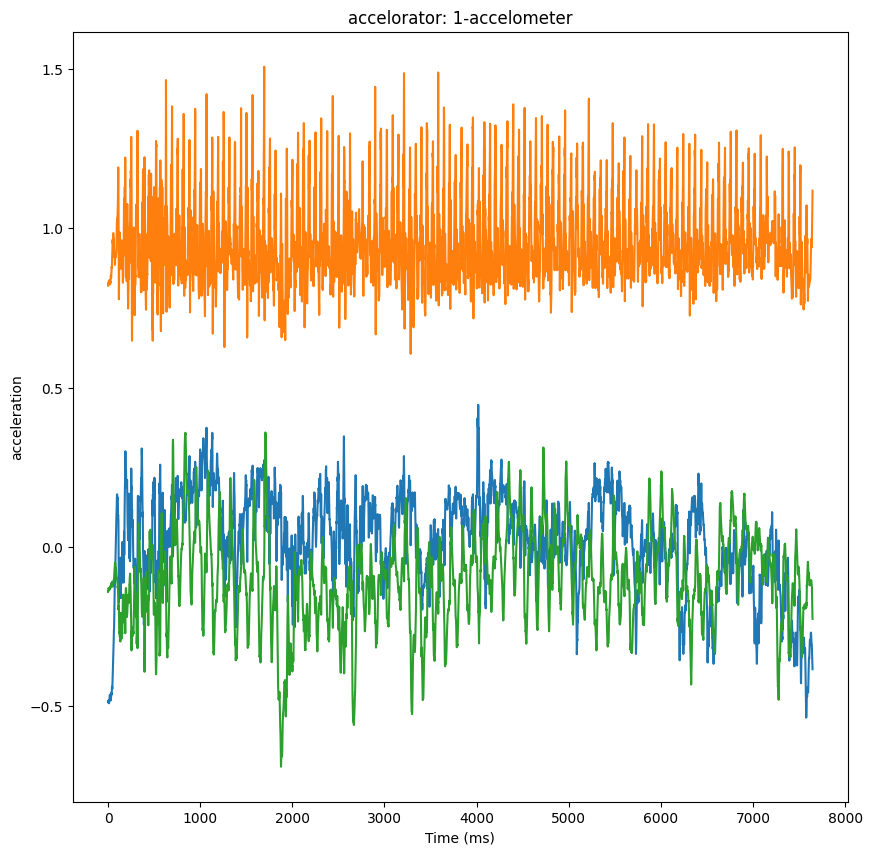

In [ ]:
fig_acc(reading_book_df[reading_book_df["Sensor"] == "Accelerometer"].iloc[1, :]["File_Path"])

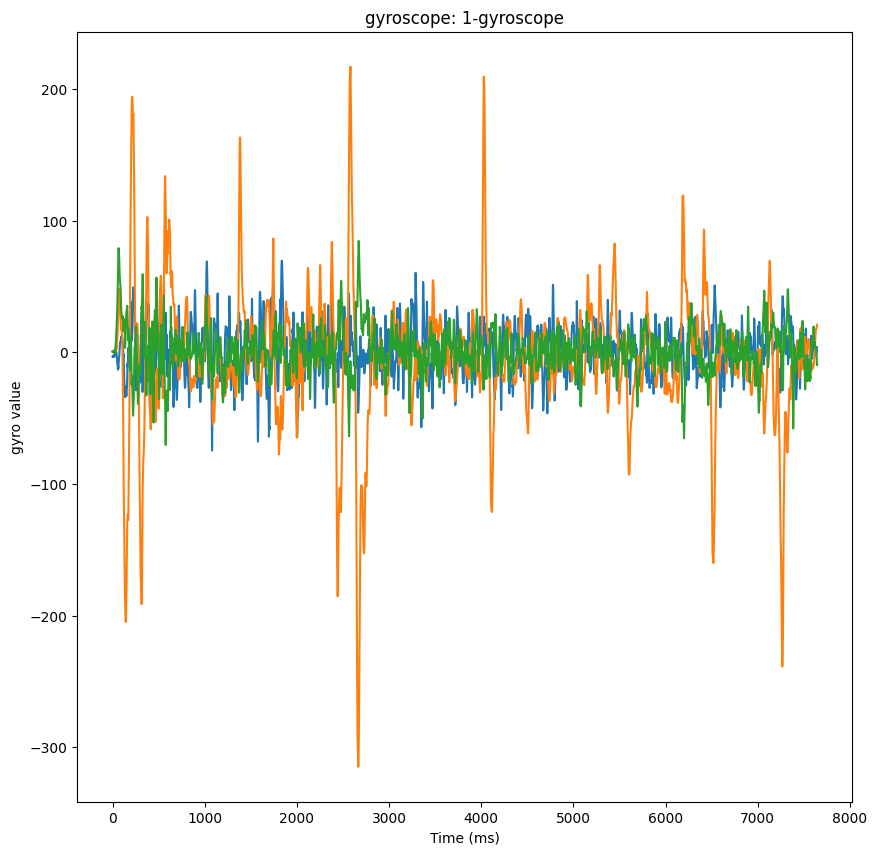

In [ ]:
fig_gyro(reading_book_df[reading_book_df["Sensor"] == "Gyroscope"].iloc[1, :]["File_Path"])

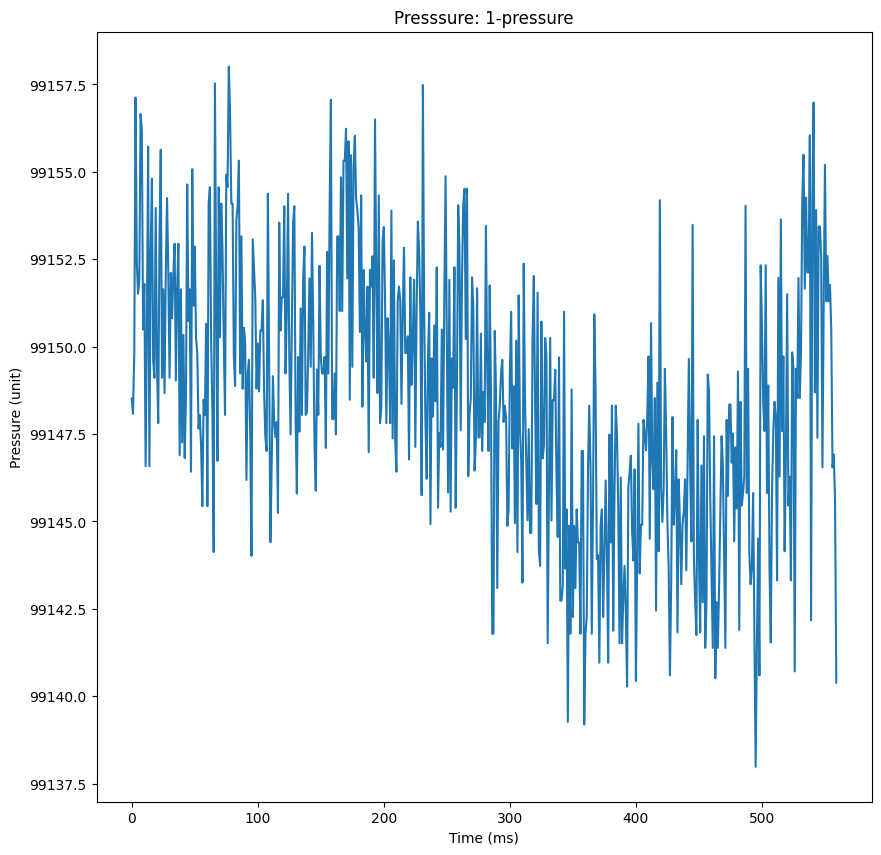

In [ ]:
fig_pressure(reading_book_df[reading_book_df["Sensor"] == "Pressure"].iloc[1, :]["File_Path"])

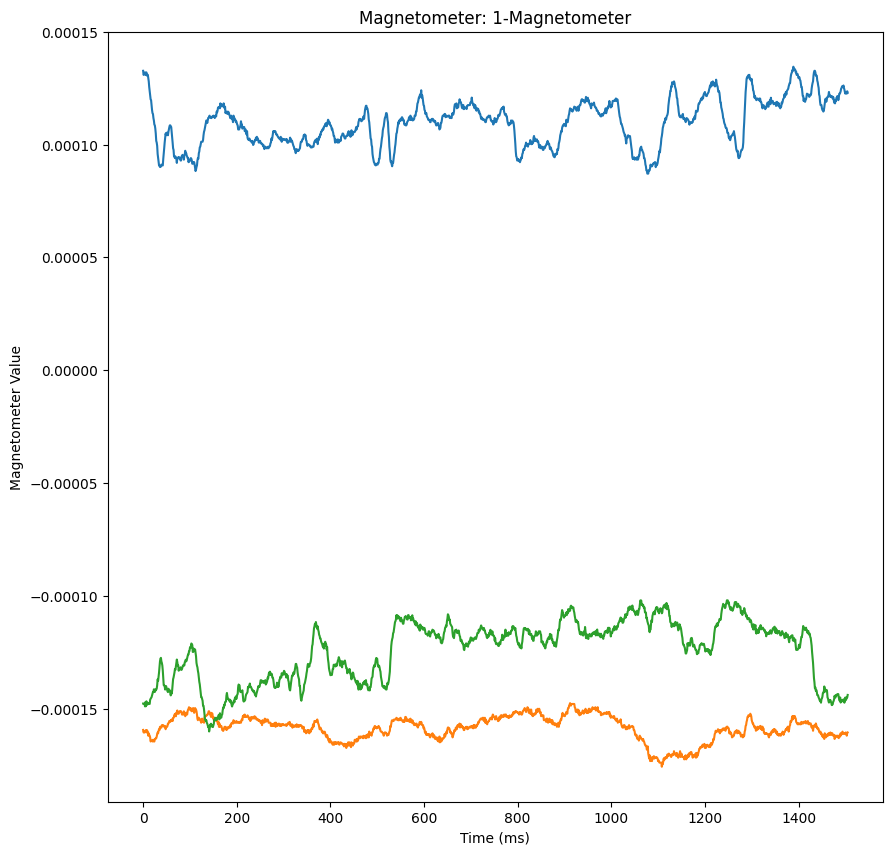

In [ ]:
fig_magnet(reading_book_df[reading_book_df["Sensor"] == "Magnetometer"].iloc[1, :]["File_Path"])

# Feature extraction(windowing)

In [ ]:
#made to a function that is callable anywhere and easier to manage with multiple tests
#takes in overlap as a decimal (0 - 1)
# window is any whole number above 0
def getFeatures(window, overlap = 0,):
  result_list = []

  for Exp_id in df["Exp_id"].value_counts().index:
    temp_df = df[df['Exp_id'] == Exp_id]

    acc_data = pd.read_csv(temp_df[temp_df["Sensor"] == "Accelerometer"].iloc[0,0])
    acc_data.rename(columns={'x-axis (g)' : 'x', 'y-axis (g)': 'y', 'z-axis (g)' : 'z'}, inplace = True)
    acc_data = acc_data[['x', 'y', 'z']]

    gyr_data = pd.read_csv(temp_df[temp_df["Sensor"] == "Gyroscope"].iloc[0,0])
    gyr_data.rename(columns={'x-axis (deg/s)' : 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)' : 'z'}, inplace = True)
    gyr_data = gyr_data[['x', 'y', 'z']]

    window_size = window
    window_overlap = int(overlap * window)


    step = window_size - window_overlap
    for i in range(0, len(acc_data) - window_size, step):
      window_acc_data = acc_data[i:i+(window_size)]
      #compute the features for the accelometer data using the curent window
      mean_acc_x = window_acc_data['x'].mean()
      var_acc_x = window_acc_data['x'].var()
      mean_acc_y = window_acc_data['y'].mean()
      var_acc_y = window_acc_data['y'].var()
      mean_acc_z = window_acc_data['z'].mean()
      var_acc_z = window_acc_data['z'].var()
      median_acc_x = window_acc_data['x'].median()
      median_acc_y = window_acc_data['y'].median()
      median_acc_z = window_acc_data['z'].median()
      std_acc_x = window_acc_data['x'].std()
      std_acc_y = window_acc_data['y'].std()
      std_acc_z = window_acc_data['z'].std()
      min_acc_x = window_acc_data['x'].min()
      min_acc_y = window_acc_data['y'].min()
      min_acc_z = window_acc_data['z'].min()
      max_acc_x = window_acc_data['x'].max()
      max_acc_y = window_acc_data['y'].max()
      max_acc_z = window_acc_data['z'].max()
      range_acc_x = max_acc_x - min_acc_x
      range_acc_y = max_acc_y - min_acc_y
      range_acc_z = max_acc_z - min_acc_z
      acc_sum_xyz_temp = window_acc_data.sum()
      acc_sum_xyz = acc_sum_xyz_temp.iloc[0] + acc_sum_xyz_temp.iloc[1] + acc_sum_xyz_temp.iloc[2]
      acc_abssum_temp = window_acc_data.abs().sum()
      acc_abssum = acc_abssum_temp.iloc[0] + acc_abssum_temp.iloc[1] + acc_abssum_temp.iloc[2]


      #the gyroscope part
      window_gyr_data = gyr_data[i:i+(window_size)]
      #compute the features for the gyroscope data using the curent window
      mean_gyr_x = window_gyr_data['x'].mean()
      var_gyr_x = window_gyr_data['x'].var()
      mean_gyr_y = window_gyr_data['y'].mean()
      var_gyr_y = window_gyr_data['y'].var()
      mean_gyr_z = window_gyr_data['z'].mean()
      var_gyr_z = window_gyr_data['z'].var()
      median_gyr_x = window_gyr_data['x'].median()
      median_gyr_y = window_gyr_data['y'].median()
      median_gyr_z = window_gyr_data['z'].median()
      std_gyr_x = window_gyr_data['x'].std()
      std_gyr_y = window_gyr_data['y'].std()
      std_gyr_z = window_gyr_data['z'].std()
      min_gyr_x = window_gyr_data['x'].min()
      min_gyr_y = window_gyr_data['y'].min()
      min_gyr_z = window_gyr_data['z'].min()
      max_gyr_x = window_gyr_data['x'].max()
      max_gyr_y = window_gyr_data['y'].max()
      max_gyr_z = window_gyr_data['z'].max()
      range_gyr_x = max_gyr_x - min_gyr_x
      range_gyr_y = max_gyr_y - min_gyr_y
      range_gyr_z = max_gyr_z - min_gyr_z
      gyr_sum_xyz_temp = window_gyr_data.sum()
      gyr_sum_xyz = gyr_sum_xyz_temp.iloc[0] + gyr_sum_xyz_temp.iloc[1] + gyr_sum_xyz_temp.iloc[2]
      gyr_abssum_temp = window_gyr_data.abs().sum()
      gyr_abssum = gyr_abssum_temp.iloc[0] + gyr_abssum_temp.iloc[1] + gyr_abssum_temp.iloc[2]


      #appends the features associated with accelometer in result_list
      result_list.append([mean_acc_x, var_acc_x, mean_acc_y,
                          var_acc_y, mean_acc_z, var_acc_z,
                          median_acc_x, median_acc_y, median_acc_z,
                          std_acc_x, std_acc_y, std_acc_z,
                          min_acc_x, min_acc_y, min_acc_z,
                          max_acc_x, max_acc_y, max_acc_z,
                          range_acc_x, range_acc_y, range_acc_z,
                          acc_sum_xyz, acc_abssum,
                          'Accelometer'])
      #appends the features associated with Gyroscope in result_list
      result_list.append([mean_gyr_x, var_gyr_x, mean_gyr_y,
                          var_gyr_y, mean_gyr_z, var_gyr_z,
                          median_gyr_x, median_gyr_y, median_gyr_z,
                          std_gyr_x, std_gyr_y, std_gyr_z,
                          min_gyr_x, min_gyr_y, min_gyr_z,
                          max_gyr_x, max_gyr_y, max_gyr_z,
                          range_gyr_x, range_gyr_y, range_gyr_z,
                          gyr_sum_xyz, gyr_abssum,
                          'Gyroscope'])

      # result_list.append([mean_acc_x, var_acc_x, mean_acc_y, var_acc_y, mean_acc_z, var_acc_z, temp_df[temp_df["Sensor"] == "Accelerometer"].iloc[0:5]])
      # result_list.append([mean_gyr_x, var_gyr_x, mean_gyr_y, var_gyr_y, mean_gyr_z, var_gyr_z, temp_df[temp_df["Sensor"] == "Gyroscope"].iloc[0:5]])
  return result_list


all the features saved in a dataframe named after the window and overlap

In [ ]:
Feature_W100_Olap0 = pd.DataFrame(getFeatures(100))
Feature_W200_Olap0 = pd.DataFrame(getFeatures(200))
Feature_W300_Olap0 = pd.DataFrame(getFeatures(300))
Feature_W400_Olap0 = pd.DataFrame(getFeatures(400))
Feature_W500_Olap0 = pd.DataFrame(getFeatures(500))
print('no overlap process done')
#the dataframes with 50% overlap
Feature_W100_Olap50 = pd.DataFrame(getFeatures(100, .5))
Feature_W200_Olap50 = pd.DataFrame(getFeatures(200, .5))
Feature_W300_Olap50 = pd.DataFrame(getFeatures(300, .5))
Feature_W400_Olap50 = pd.DataFrame(getFeatures(400, .5))
Feature_W500_Olap50 = pd.DataFrame(getFeatures(500, .5))
print("process done")

no overlap process done
process done


In [ ]:
#helps in making the process of data management easier(this is not needed in the full test)
Feature_W100_Olap0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W100_Olap.csv')
Feature_W200_Olap0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W200_Olap.csv')
Feature_W300_Olap0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W300_Olap.csv')
Feature_W400_Olap0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W400_Olap.csv')
Feature_W500_Olap0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W500_Olap.csv')
Feature_W100_Olap50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W100_Olap50.csv')
Feature_W200_Olap50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W200_Olap50.csv')
Feature_W300_Olap50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W300_Olap50.csv')
Feature_W400_Olap50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W400_Olap50.csv')
Feature_W500_Olap50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/Feature_W500_Olap50.csv')



NameError: name 'Feature_W100_Olap0' is not defined

The five Features that are required to be shown in for the midterm report
- The other five can be seen if need be

In [ ]:
Feature_W100_Olap50.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.77164,0.000025,0.59924,0.000014,0.01619,0.000018,-0.7710,0.5990,0.0155,0.004980,...,0.008,-0.756,0.608,0.026,0.026,0.017,0.018,-15.621,138.707,Accelometer
1,0.25238,0.737667,-0.92873,1.134133,0.04880,0.196349,0.0305,-0.7625,0.0000,0.858875,...,-0.915,2.378,0.549,1.098,3.658,5.000,2.013,-62.755,197.775,Gyroscope
2,-0.77247,0.000032,0.59805,0.000018,0.01757,0.000016,-0.7720,0.5980,0.0180,0.005616,...,0.008,-0.756,0.608,0.026,0.028,0.018,0.018,-15.685,138.809,Accelometer
3,0.48102,1.021973,-0.87923,1.580871,-0.00854,0.152600,0.0915,-0.3965,0.0610,1.010927,...,-0.854,2.378,0.610,0.915,3.658,5.061,1.769,-40.675,219.837,Gyroscope
4,-0.77432,0.000032,0.59610,0.000017,0.01817,0.000012,-0.7740,0.5960,0.0180,0.005621,...,0.012,-0.761,0.605,0.027,0.025,0.020,0.015,-16.005,138.859,Accelometer
5,0.32076,0.643111,-0.67676,1.113382,0.03961,0.249466,0.2135,-0.4575,0.1220,0.801942,...,-0.854,2.317,1.220,1.829,3.658,3.964,2.683,-31.639,198.381,Gyroscope
6,-0.77600,0.000214,0.59409,0.000033,0.01881,0.000081,-0.7735,0.5945,0.0180,0.014621,...,-0.004,-0.752,0.611,0.042,0.062,0.032,0.046,-16.310,138.914,Accelometer
7,0.07561,1.715260,-0.29510,6.675576,-0.07439,1.292307,-0.0305,0.0000,0.1830,1.309679,...,-3.841,2.927,4.878,1.829,5.793,11.951,5.670,-29.388,369.046,Gyroscope
8,-0.77784,0.000197,0.59128,0.000034,0.01942,0.000083,-0.7780,0.5910,0.0200,0.014049,...,-0.004,-0.752,0.611,0.042,0.062,0.032,0.046,-16.714,138.878,Accelometer
9,0.52253,2.229856,-0.74332,7.080815,-0.24391,1.197965,0.5795,-0.7930,-0.0610,1.493270,...,-3.841,3.049,4.878,1.707,5.915,11.951,5.548,-46.470,419.404,Gyroscope


In [ ]:
Feature_W200_Olap50.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.772980,0.000030,0.597670,0.000018,0.017180,0.000016,-0.7720,0.5980,0.0170,0.005464,...,0.008,-0.756,0.608,0.027,0.030,0.023,0.019,-31.626,277.566,Accelometer
1,0.286570,0.688094,-0.802745,1.134063,0.044205,0.221808,0.1220,-0.6710,0.0610,0.829515,...,-0.915,2.378,1.220,1.829,3.719,5.671,2.744,-94.394,396.156,Gyroscope
2,-0.776080,0.000117,0.593690,0.000031,0.018795,0.000048,-0.7750,0.5940,0.0190,0.010818,...,-0.004,-0.752,0.611,0.042,0.062,0.032,0.046,-32.719,277.737,Accelometer
3,0.421645,1.439494,-0.710040,4.077623,-0.102150,0.740276,0.2745,-0.6405,0.0305,1.199789,...,-3.841,3.049,4.878,1.829,5.915,11.951,5.670,-78.109,617.785,Gyroscope
4,-0.780400,0.000118,0.588240,0.000037,0.019975,0.000051,-0.7805,0.5880,0.0200,0.010876,...,-0.004,-0.752,0.611,0.042,0.062,0.037,0.046,-34.437,277.747,Accelometer
5,0.294465,1.727099,-0.654860,3.922465,-0.275980,0.706855,-0.0610,-0.6100,-0.2440,1.314191,...,-3.841,3.232,4.878,1.707,6.098,11.951,5.548,-127.275,632.067,Gyroscope
6,-0.784655,0.000025,0.583260,0.000026,0.023325,0.000039,-0.7850,0.5830,0.0220,0.005021,...,0.010,-0.769,0.599,0.038,0.028,0.028,0.028,-35.614,278.248,Accelometer
7,0.204270,0.810495,-1.071335,1.073658,-0.084790,0.237837,-0.0610,-1.0370,-0.0610,0.900275,...,-1.159,3.232,0.976,0.976,4.573,4.756,2.135,-190.371,462.759,Gyroscope
8,-0.787360,0.000017,0.580390,0.000017,0.031150,0.000056,-0.7870,0.5800,0.0330,0.004101,...,0.011,-0.776,0.593,0.045,0.021,0.022,0.034,-35.164,279.780,Accelometer
9,0.383920,0.510141,-1.335440,0.728125,0.116205,0.130463,0.4880,-1.2200,0.1220,0.714242,...,-1.098,2.195,0.427,0.976,3.232,4.207,2.074,-167.063,468.007,Gyroscope


In [ ]:
Feature_W300_Olap0.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.774600,0.000090,0.595540,0.000032,0.017927,0.000039,-0.774,0.5960,0.0180,0.009513,...,-0.004,-0.752,0.611,0.042,0.062,0.032,0.046,-48.340,416.444,Accelometer
1,0.365223,1.208690,-0.782937,3.100049,-0.051833,0.562784,0.183,-0.6710,0.0000,1.099404,...,-3.841,3.049,4.878,1.829,5.915,11.951,5.670,-140.864,815.560,Gyroscope
2,-0.785893,0.000024,0.581993,0.000024,0.027610,0.000068,-0.786,0.5820,0.0270,0.004949,...,0.010,-0.769,0.599,0.045,0.028,0.028,0.035,-52.887,418.649,Accelometer
3,0.278080,0.738373,-1.079093,0.877357,-0.025213,0.200072,0.122,-1.0370,0.0610,0.859286,...,-1.159,3.232,0.976,0.976,4.573,4.756,2.135,-247.868,680.670,Gyroscope
4,-0.784773,0.000130,0.582737,0.000057,0.046800,0.000087,-0.786,0.5820,0.0450,0.011403,...,0.017,-0.753,0.613,0.074,0.078,0.061,0.057,-46.571,424.293,Accelometer
5,0.199207,5.976593,-0.716480,11.408295,0.419163,0.687287,0.244,-0.7930,0.4270,2.444707,...,-1.951,10.549,7.683,2.866,17.439,21.829,4.817,-29.433,1395.981,Gyroscope
6,-0.784743,0.000071,0.583150,0.000044,0.056290,0.000274,-0.785,0.5830,0.0500,0.008404,...,0.033,-0.756,0.603,0.094,0.049,0.038,0.061,-43.591,427.255,Accelometer
7,-0.573563,3.064287,-1.182723,11.560479,0.489017,1.725018,-0.122,-0.7625,0.2135,1.750511,...,-1.768,2.927,5.427,5.366,9.207,16.525,7.134,-380.181,1460.729,Gyroscope
8,-0.781093,0.000066,0.587037,0.000035,0.059640,0.000133,-0.782,0.5870,0.0555,0.008150,...,0.044,-0.758,0.602,0.093,0.038,0.027,0.049,-40.325,428.331,Accelometer
9,0.194913,0.964248,0.490837,5.342748,-0.140463,0.969257,0.122,-0.1830,-0.0915,0.981961,...,-3.049,2.622,6.829,2.134,5.915,9.207,5.183,163.586,938.200,Gyroscope


In [ ]:
Feature_W400_Olap0.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.776690,0.000088,0.592955,0.000050,0.018577,0.000035,-0.7760,0.5940,0.019,0.009364,...,-0.004,-0.752,0.611,0.042,0.062,0.037,0.046,-66.063,555.313,Accelometer
1,0.290517,1.204586,-0.728802,2.527409,-0.115888,0.488862,0.0610,-0.6405,-0.061,1.097536,...,-3.841,3.232,4.878,1.829,6.098,11.951,5.670,-221.669,1028.223,Gyroscope
2,-0.786850,0.000026,0.580647,0.000019,0.038152,0.000088,-0.7870,0.5810,0.040,0.005057,...,0.011,-0.767,0.605,0.061,0.030,0.038,0.050,-67.220,562.260,Accelometer
3,0.375207,1.091717,-1.280548,1.890114,0.316068,0.296145,0.3660,-1.1590,0.244,1.044852,...,-1.098,2.866,5.488,2.256,7.805,10.488,3.354,-235.709,1108.299,Gyroscope
4,-0.783967,0.000132,0.583962,0.000062,0.054740,0.000262,-0.7850,0.5830,0.051,0.011470,...,0.017,-0.753,0.613,0.094,0.078,0.061,0.077,-58.106,569.068,Accelometer
5,-0.464015,5.931796,-0.811575,15.712671,0.423170,1.615644,-0.3355,-0.4880,0.244,2.435528,...,-1.951,10.549,7.683,5.366,17.439,21.829,7.317,-340.968,2216.418,Gyroscope
6,-0.782262,0.000060,0.586058,0.000032,0.058658,0.000105,-0.7830,0.5850,0.056,0.007753,...,0.044,-0.758,0.602,0.093,0.038,0.027,0.049,-55.019,570.791,Accelometer
7,0.201838,0.786440,0.204688,4.351960,-0.013548,0.821342,0.1220,-0.3050,0.122,0.886814,...,-3.049,2.622,6.829,2.134,5.915,9.207,5.183,157.191,1096.107,Gyroscope
8,-0.775340,0.000100,0.593075,0.000059,0.078672,0.000121,-0.7770,0.5920,0.079,0.010008,...,0.043,-0.739,0.614,0.099,0.056,0.039,0.056,-41.437,578.835,Accelometer
9,0.141805,1.487228,-0.861268,6.393961,0.253905,1.202645,0.1830,-0.1830,0.000,1.219519,...,-1.707,3.598,5.305,3.780,7.318,15.000,5.487,-186.223,1399.259,Gyroscope


In [ ]:
Feature_W500_Olap50.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.778622,0.000089,0.590628,0.000066,0.020086,0.000046,-0.779,0.591,0.020,0.009412,...,-0.004,-0.752,0.611,0.042,0.062,0.040,0.046,-83.954,694.692,Accelometer
1,0.300842,1.053698,-0.898296,2.305718,-0.065016,0.432329,0.122,-0.915,0.000,1.026498,...,-3.841,3.232,4.878,1.829,6.098,11.951,5.670,-331.235,1278.319,Gyroscope
2,-0.785566,0.000031,0.582166,0.000030,0.031554,0.000118,-0.786,0.582,0.033,0.005570,...,0.009,-0.769,0.599,0.055,0.028,0.032,0.046,-85.923,699.643,Accelometer
3,0.497960,0.821346,-1.159300,0.929909,0.073804,0.243466,0.366,-1.098,0.122,0.906281,...,-1.463,3.232,0.976,1.585,4.573,4.756,3.048,-293.768,1215.662,Gyroscope
4,-0.785642,0.000087,0.582226,0.000040,0.043790,0.000076,-0.786,0.582,0.042,0.009328,...,0.017,-0.753,0.613,0.074,0.078,0.061,0.057,-79.813,705.829,Accelometer
5,0.247110,3.847914,-0.689918,7.354857,0.225888,0.562680,0.305,-0.793,0.244,1.961610,...,-1.951,10.549,7.683,2.866,17.439,21.829,4.817,-108.460,1839.836,Gyroscope
6,-0.782938,0.000128,0.584834,0.000059,0.056898,0.000286,-0.784,0.584,0.053,0.011321,...,0.017,-0.753,0.613,0.094,0.078,0.061,0.077,-70.603,712.335,Accelometer
7,-0.536832,5.130377,-0.417438,15.832597,0.350354,1.650143,-0.366,-0.305,0.244,2.265034,...,-3.049,10.549,7.683,5.366,17.439,21.829,8.415,-301.958,2744.364,Gyroscope
8,-0.782398,0.000080,0.585420,0.000049,0.061084,0.000186,-0.783,0.585,0.057,0.008951,...,0.033,-0.756,0.603,0.094,0.049,0.038,0.061,-67.947,714.451,Accelometer
9,-0.269636,2.406560,-0.374024,10.624276,0.253530,1.631809,0.000,-0.488,0.183,1.551309,...,-3.049,2.927,6.829,5.366,9.207,17.927,8.415,-195.065,2172.985,Gyroscope


A dataframe that lists the row count for each different window and overlap

In [ ]:

rowsDf = pd.DataFrame([
    {'Window': 'Feature_W100_Olap0', 'Row_Count': len(Feature_W100_Olap0)},
    {'Window': 'Feature_W200_Olap0', 'Row_Count': len(Feature_W200_Olap0)},
    {'Window': 'Feature_W300_Olap0', 'Row_Count': len(Feature_W300_Olap0)},
    {'Window': 'Feature_W400_Olap0', 'Row_Count': len(Feature_W400_Olap0)},
    {'Window': 'Feature_W500_Olap0', 'Row_Count': len(Feature_W500_Olap0)},
    {'Window': 'Feature_W100_Olap50', 'Row_Count': len(Feature_W100_Olap50)},
    {'Window': 'Feature_W200_Olap50', 'Row_Count': len(Feature_W200_Olap50)},
    {'Window': 'Feature_W300_Olap50', 'Row_Count': len(Feature_W300_Olap50)},
    {'Window': 'Feature_W400_Olap50', 'Row_Count': len(Feature_W400_Olap50)},
    {'Window': 'Feature_W500_Olap50', 'Row_Count': len(Feature_W500_Olap50)}
    ])

rowsDf

,Window,Row_Count
0,Feature_W100_Olap0,29550
1,Feature_W200_Olap0,14708
2,Feature_W300_Olap0,9764
3,Feature_W400_Olap0,7288
4,Feature_W500_Olap0,5814
5,Feature_W100_Olap50,58980
6,Feature_W200_Olap50,29292
7,Feature_W300_Olap50,19404
8,Feature_W400_Olap50,14450
9,Feature_W500_Olap50,11486


# Observations
---

***Feature Extraction***

For many of the windows when the overlap is added there is a increase in row count(window count). While the longer window, in general, will give a lower overal window count.

***Duplicates and missing Datapoints***

For test 113 there was a duplicate of each sensor, so in turn I had deleted the duplicates in the dataset manually. As for missing values there was three tests that were mising, so in the code those tests for the users are skipped.

***Activity ID***

Since many of the Exp_ids are not a straight 1-11, there needed to be a way to sinify with test was what activity. So the way I did that was to make a seperate csv file that has all of the different Exp ids and there activity number and joined that to the main dataframe.

***Graphs***


Many of the graphs seemed to show relativly the same ditribution between axes. With some of them having one axis that is higher or lower than the others on some of the different graphs.


#Final Report
---

Needed models
- Logistic Regression
- Decision Trees
- Random Forest
- Gaussian Naïve Bayes
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- AdaBoost
- Gradient Boost
- XGBoost
- Artificial Neural Networks (ANN)

need hyperparameter tuning and cross validation for each

In [ ]:
#again not needed for the final run but is helful in making the whole process faster
file_path = '/content/drive/MyDrive/10thsemester/machinelearning/windowsCSV/*'
file = glob.glob(file_path)

Feature_W100_Olap0 = pd.read_csv(file[0])
Feature_W200_Olap0 = pd.read_csv(file[1])
Feature_W300_Olap0 = pd.read_csv(file[2])
Feature_W400_Olap0 = pd.read_csv(file[3])
Feature_W500_Olap0 = pd.read_csv(file[4])
Feature_W100_Olap50 = pd.read_csv(file[5])
Feature_W200_Olap50 = pd.read_csv(file[6])
Feature_W300_Olap50 = pd.read_csv(file[7])
Feature_W400_Olap50 = pd.read_csv(file[8])
Feature_W500_Olap50 = pd.read_csv(file[9])




In [ ]:

rowsDf = pd.DataFrame([
    {'Window': 'Feature_W100_Olap0', 'Row_Count': len(Feature_W100_Olap0)},
    {'Window': 'Feature_W200_Olap0', 'Row_Count': len(Feature_W200_Olap0)},
    {'Window': 'Feature_W300_Olap0', 'Row_Count': len(Feature_W300_Olap0)},
    {'Window': 'Feature_W400_Olap0', 'Row_Count': len(Feature_W400_Olap0)},
    {'Window': 'Feature_W500_Olap0', 'Row_Count': len(Feature_W500_Olap0)},
    {'Window': 'Feature_W100_Olap50', 'Row_Count': len(Feature_W100_Olap50)},
    {'Window': 'Feature_W200_Olap50', 'Row_Count': len(Feature_W200_Olap50)},
    {'Window': 'Feature_W300_Olap50', 'Row_Count': len(Feature_W300_Olap50)},
    {'Window': 'Feature_W400_Olap50', 'Row_Count': len(Feature_W400_Olap50)},
    {'Window': 'Feature_W500_Olap50', 'Row_Count': len(Feature_W500_Olap50)}
    ])

rowsDf

,Window,Row_Count
0,Feature_W100_Olap0,29550
1,Feature_W200_Olap0,14708
2,Feature_W300_Olap0,9764
3,Feature_W400_Olap0,7288
4,Feature_W500_Olap0,5814
5,Feature_W100_Olap50,58980
6,Feature_W200_Olap50,29292
7,Feature_W300_Olap50,19404
8,Feature_W400_Olap50,14450
9,Feature_W500_Olap50,11486


#HyperParameter Tuning

In [ ]:
#imports for the hyperparemter Tuning
from logging import warning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
def logisticReg(dataf):
  #this being added as the liblinear is not good for higher row counts
  if len(dataf) > 10000:
    param_grid = [
        {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']},
        {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']},
        {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], "l1_ratio": [0.5]}
    ]
  else:
    param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], "l1_ratio": [0.5]}
    ]
  X_train, X_test, Y_train, Y_test = train_test_split(
      dataf.iloc[:, :-1],
      dataf.iloc[:, -1],
      test_size=0.2,
      random_state=42
  )

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  logic = LogisticRegression(max_iter=10000)
  rand_search = RandomizedSearchCV(logic, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
  rand_search.fit(X_train, Y_train)
  y_pred = rand_search.best_estimator_.predict(X_test)
  return [rand_search.best_params_,
          rand_search.best_score_,
          rand_search.best_estimator_.score(X_test, Y_test),
          f1_score(Y_test, y_pred, average='macro'),
          recall_score(Y_test, y_pred, average='macro')
          ]
#===============================================================
def decision(dataf):
    param_grid = {
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = DecisionTreeClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def randomFor(dataf):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = RandomForestClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def gaussian(dataf):
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = GaussianNB()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def supportSVM(dataf):
    for col in dataf.select_dtypes(include=['object']).columns:
        dataf[col] = dataf[col].astype('category').cat.codes
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = SVC()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def knn(dataf):
    for col in dataf.select_dtypes(include=['object']).columns:
        dataf[col] = dataf[col].astype('category').cat.codes
    param_grid = {
        'n_neighbors': [3, 5, 7, 11],
        'weights': ['uniform', 'distance'],
        'metric': ["manhattan", "euclidean"]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = KNeighborsClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def adaboost(dataf):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = AdaBoostClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def gradient(dataf):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = GradientBoostingClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def xgboost(dataf):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = XGBClassifier()
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

#======================================
def ann(dataf):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    X_train, X_test, Y_train, Y_test = train_test_split(
        dataf.iloc[:, :-1],
        dataf.iloc[:, -1],
        test_size=0.2,
        random_state=42
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = MLPClassifier(max_iter=20000)
    rand_search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=5, scoring='accuracy', error_score="raise", n_jobs=-1)
    rand_search.fit(X_train, Y_train)
    y_pred = rand_search.best_estimator_.predict(X_test)
    return [rand_search.best_params_,
            rand_search.best_score_,
            rand_search.best_estimator_.score(X_test, Y_test),
            f1_score(Y_test, y_pred, average='macro'),
            recall_score(Y_test, y_pred, average='macro')]

In [ ]:
print(supportSVM(Feature_W100_Olap0))


[{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}, np.float64(0.9918781725888325), 0.9915397631133672, 0.9915337120423793, 0.9913929513141362]


In [ ]:
def fullTest(dataf):
  ret = {
    "Model": [],
    "tuning method": [],
    "Best Parameters": [],
    "Best Score": [],
    "Accuracy": [],
    "F1 Score": [],
    "Recall": []
  }

  # Logistic Regression
  results = logisticReg(dataf)
  ret["Model"].append("Logistic Regression")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Decision Tree
  results = decision(dataf)
  ret["Model"].append("Decision Tree")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Random Forest
  results = randomFor(dataf)
  ret["Model"].append("Random Forest")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Gaussian Naive Bayes
  results = gaussian(dataf)
  ret["Model"].append("Gaussian Naive Bayes")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Support Vector Machine (SVM)
  results = supportSVM(dataf)
  ret["Model"].append("Support Vector Machine")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # K-Nearest Neighbors (KNN)
  results = knn(dataf)
  ret["Model"].append("K-Nearest Neighbors")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # AdaBoost
  results = adaboost(dataf)
  ret["Model"].append("AdaBoost")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Gradient Boosting
  results = gradient(dataf)
  ret["Model"].append("Gradient Boosting")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # XGBoost
  results = xgboost(dataf)
  ret["Model"].append("XGBoost")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  # Artificial Neural Network (ANN)
  results = ann(dataf)
  ret["Model"].append("Artificial Neural Network")
  ret["tuning method"].append("RandomizedSearchCV")
  ret["Best Parameters"].append(results[0])
  ret["Best Score"].append(results[1])
  ret["Accuracy"].append(results[2])
  ret["F1 Score"].append(results[3])
  ret["Recall"].append(results[4])

  return ret

In [ ]:
test = fullTest(Feature_W100_Olap50)
print(test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Artificial Neural Network'], 'tuning method': ['RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV'], 'Best Parameters': [{'solver': 'saga', 'penalty': 'l1', 'C': 10}, {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy'}, {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}, {'var_smoothing': 1e-09}, {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 100}, {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}, {'n_estimators': 200, 'learning_rate': 1}, {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}, {'subsample': 0.6, 'n_estimators': 100,

In [ ]:
full100_0 = pd.DataFrame(fullTest(Feature_W100_Olap0))
full100_0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full100_0.csv')
full100_50 = pd.DataFrame(fullTest(Feature_W100_Olap50))
full100_50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full100_50.csv')
full200_0 = pd.DataFrame(fullTest(Feature_W200_Olap0))
full200_0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full200_0.csv')
full200_50 = pd.DataFrame(fullTest(Feature_W200_Olap50))
full200_50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full200_50.csv')
full300_0 = pd.DataFrame(fullTest(Feature_W300_Olap0))
full300_0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full300_0.csv')
print("halfway done")
full300_50 = pd.DataFrame(fullTest(Feature_W300_Olap50))
full300_50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full300_50.csv')
full400_0 = pd.DataFrame(fullTest(Feature_W400_Olap0))
full400_0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full400_0.csv')
full400_50 = pd.DataFrame(fullTest(Feature_W400_Olap50))
full400_50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full400_50.csv')
full500_0 = pd.DataFrame(fullTest(Feature_W500_Olap0))
full500_0.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full500_0.csv')
full500_50 = pd.DataFrame(fullTest(Feature_W500_Olap50))
full500_50.to_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full500_50.csv')



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_sea

halfway done


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_sea

In [ ]:
#read in the csv files from above
full100_0 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full100_0.csv')
full100_50 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full100_50.csv')
full200_0 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full200_0.csv')
full200_50 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full200_50.csv')
full300_0 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full300_0.csv')
full300_50 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full300_50.csv')
full400_0 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full400_0.csv')
full400_50 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full400_50.csv')
full500_0 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full500_0.csv')
full500_50 = pd.read_csv('/content/drive/MyDrive/10thsemester/machinelearning/hyperparameters/full500_50.csv')


In [ ]:
print("full100_0")
full100_0

full100_0


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.989975,0.989848,0.989840,0.989687
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.997673,0.997462,0.997461,0.997471
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.998858,0.999492,0.999492,0.999495
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.988325,0.985448,0.985437,0.985280
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 0.1, 'C': 10}",0.996658,0.997293,0.997292,0.997266
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.999577,0.999831,0.999831,0.999827
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999112,0.999831,0.999831,0.999827
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.999027,0.999662,0.999661,0.999661
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.999112,0.999662,0.999661,0.999655
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.997208,0.997631,0.997630,0.997591


In [ ]:
print("full100_50")
full100_50

full100_50


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'l1', 'C': 10}",0.992328,0.993472,0.993472,0.993456
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.998516,0.998813,0.998813,0.998812
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.999449,1.000000,1.000000,1.000000
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.987941,0.986775,0.986773,0.986745
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}",0.991205,0.992709,0.992709,0.992689
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 5, 'metr...",0.999746,0.999576,0.999576,0.999574
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 100, 'learning_rate': 1}",0.999703,0.999830,0.999830,0.999830
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",0.999407,0.999746,0.999746,0.999745
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.999513,0.999830,0.999830,0.999830
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'constant'...",0.995846,0.997202,0.997202,0.997199


In [ ]:
print("full200_0")
full200_0

full200_0


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.990566,0.991162,0.991161,0.991116
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.998130,0.997621,0.997621,0.997618
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999150,0.999320,0.999320,0.999316
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.991331,0.990823,0.990822,0.990812
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 0.1, 'C': 1}",0.994561,0.995921,0.995921,0.995904
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'distance', 'n_neighbors': 3, 'met...",0.999320,1.000000,1.000000,1.000000
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999660,0.998300,0.998300,0.998294
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.998895,0.998980,0.998980,0.998978
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 1.0, 'n_estimators': 200, 'max_d...",0.999490,0.999660,0.999660,0.999658
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.996600,0.997281,0.997281,0.997285


In [ ]:
print("full200_50")
full200_50

full200_50


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'l1', 'C': 100}",0.992745,0.994197,0.994195,0.994131
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.998762,0.999488,0.999488,0.999486
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.999488,0.999829,0.999829,0.999827
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.990825,0.990954,0.990951,0.990900
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 'scale', 'C': 100}",0.998250,0.998293,0.998293,0.998293
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.999787,1.000000,1.000000,1.000000
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999659,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",0.999317,1.000000,1.000000,1.000000
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.999573,0.999659,0.999659,0.999659
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'constant'...",0.998720,0.998635,0.998634,0.998630


In [ ]:
print("full300_0")
full300_0

full300_0


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.992831,0.990783,0.990782,0.990959
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.998208,0.996928,0.996926,0.996949
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.998848,0.998976,0.998975,0.998975
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.992831,0.991295,0.991292,0.991370
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 100}",0.997696,0.997952,0.997951,0.997973
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.999744,0.999488,0.999488,0.999499
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 100, 'learning_rate': 1}",0.999360,0.999488,0.999488,0.999499
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",0.998464,0.998976,0.998975,0.998998
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.998976,0.999488,0.999488,0.999499
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.998080,0.998976,0.998975,0.998975


In [ ]:
print("full300_50")
full300_50

full300_50


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.993429,0.991755,0.991748,0.991590
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.998518,0.998969,0.998969,0.998947
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999227,1.000000,1.000000,1.000000
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.992656,0.991497,0.991491,0.991380
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 0.1, 'C': 100}",0.998325,0.999485,0.999484,0.999474
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'distance', 'n_neighbors': 3, 'met...",0.999871,0.999742,0.999742,0.999737
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 100, 'learning_rate': 1}",0.999742,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.999291,0.999742,0.999742,0.999737
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.999485,0.999742,0.999742,0.999737
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.996715,0.997166,0.997164,0.997105


In [ ]:
print("full400_0")
full400_0

full400_0


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.989364,0.991084,0.991079,0.990960
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.997770,0.995199,0.995198,0.995170
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.998456,0.999314,0.999314,0.999323
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.993482,0.991770,0.991767,0.991712
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}",0.995883,0.997942,0.997942,0.997914
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'distance', 'n_neighbors': 11, 'me...",0.999314,1.000000,1.000000,1.000000
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 50, 'learning_rate': 1}",0.998799,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.998113,0.996571,0.996570,0.996579
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.998628,1.000000,1.000000,1.000000
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.997599,0.998628,0.998628,0.998609


In [ ]:
print("full400_50")
full400_50

full400_50


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'l1', 'C': 10}",0.993772,0.994464,0.994464,0.994494
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.998443,1.000000,1.000000,1.000000
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.999395,1.000000,1.000000,1.000000
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.992907,0.995502,0.995502,0.995519
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}",0.998702,0.999308,0.999308,0.999312
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.999654,1.000000,1.000000,1.000000
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999741,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.999308,1.000000,1.000000,1.000000
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 1.0, 'n_estimators': 200, 'max_d...",0.999395,1.000000,1.000000,1.000000
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'constant'...",0.998875,0.999654,0.999654,0.999652


In [ ]:
print("full500_0")
full500_0

full500_0


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'liblinear', 'penalty': 'l2', 'C': ...",0.996345,0.995701,0.995699,0.995805
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.998495,0.999140,0.999140,0.999161
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.999355,0.999140,0.999140,0.999161
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.995055,0.992261,0.992257,0.992278
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'linear', 'gamma': 0.1, 'C': 10}",0.998065,0.998280,0.998279,0.998322
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'distance', 'n_neighbors': 11, 'me...",0.999140,0.997420,0.997419,0.997483
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999785,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.998710,0.999140,0.999140,0.999161
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.998710,0.999140,0.999140,0.999161
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.998281,0.997420,0.997419,0.997483


In [ ]:
print("full500_50")
full500_50

full500_50


,Unnamed: 0,Model,tuning method,Best Parameters,Best Score,Accuracy,F1 Score,Recall
0,0,Logistic Regression,RandomizedSearchCV,"{'solver': 'saga', 'penalty': 'elasticnet', 'l...",0.993687,0.993473,0.993473,0.993495
1,1,Decision Tree,RandomizedSearchCV,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.998694,0.998695,0.998695,0.998696
2,2,Random Forest,RandomizedSearchCV,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.999456,1.000000,1.000000,1.000000
3,3,Gaussian Naive Bayes,RandomizedSearchCV,{'var_smoothing': 1e-09},0.994558,0.994343,0.994343,0.994347
4,4,Support Vector Machine,RandomizedSearchCV,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}",0.999021,0.999565,0.999565,0.999566
5,5,K-Nearest Neighbors,RandomizedSearchCV,"{'weights': 'uniform', 'n_neighbors': 7, 'metr...",0.999565,0.999565,0.999565,0.999566
6,6,AdaBoost,RandomizedSearchCV,"{'n_estimators': 200, 'learning_rate': 1}",0.999782,1.000000,1.000000,1.000000
7,7,Gradient Boosting,RandomizedSearchCV,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",0.999238,1.000000,1.000000,1.000000
8,8,XGBoost,RandomizedSearchCV,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.999565,1.000000,1.000000,1.000000
9,9,Artificial Neural Network,RandomizedSearchCV,"{'solver': 'adam', 'learning_rate': 'constant'...",0.998585,0.997824,0.997824,0.997832


#Cross Validation

Should have a mixture of
- K-fold cross validation
- stratified k-fold cross validation

Performance metrics
- Accuracy, Precision, Recall, F1-score, ROC-AUC (as required)
- Split strategy: Use standard 80/20 train/test split and also the 70/30 split

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder


In [ ]:

def logKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = LogisticRegression(max_iter=1000)

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Logistic Regression", cv_type, accuracy, f1, recall, precision]

def treeKfold(dataf, fold=5, split=0.2, foldType=1):


    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = DecisionTreeClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Decision Tree", cv_type, accuracy, f1, recall, precision]

def treeKfold(dataf, fold=5, split=0.2, foldType=1):

    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = DecisionTreeClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Decision Tree", cv_type, accuracy, f1, recall, precision]

def rfKfold(dataf, fold=5, split=0.2, foldType=1):

    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = RandomForestClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Random Forest", cv_type, accuracy, f1, recall, precision]

def gnbKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = GaussianNB()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Gaussian NB", cv_type, accuracy, f1, recall, precision]

def svmKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = SVC()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"

        # Stratified K-Fold
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)
    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["SVM", cv_type, accuracy, f1, recall, precision]

def knnKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = KNeighborsClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["KNN", cv_type, accuracy, f1, recall, precision]

def adaKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = AdaBoostClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["AdaBoost", cv_type, accuracy, f1, recall, precision]

def gradKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = GradientBoostingClassifier()

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["Gradient Boost", cv_type, accuracy, f1, recall, precision]

def xgbKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    unique_labels = np.unique(y_encoded)
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = XGBClassifier(eval_metric='logloss')

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y_encoded, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["XGBoost", cv_type, accuracy, f1, recall, precision]

def annKfold(dataf, fold=5, split=0.2, foldType=1):
    X = dataf.iloc[:, :-1]
    y = dataf.iloc[:, -1]

    unique_labels = y.unique()
    pos_label = unique_labels[1] if len(unique_labels) == 2 else 1

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = MLPClassifier(max_iter=1000)

    if foldType == 1:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "K-Fold"
    else:
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        cv_type = "Stratified K-Fold"

    scoring = {
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, pos_label=pos_label),
        'recall': make_scorer(recall_score, pos_label=pos_label),
        'precision': make_scorer(precision_score, pos_label=pos_label)
    }

    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)

    accuracy = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1'])
    recall = np.mean(scores['test_recall'])
    precision = np.mean(scores['test_precision'])

    return ["ANN", cv_type, accuracy, f1, recall, precision]


In [ ]:
def CrossValidation(dataf, fold, split, foldType):
  ret = {"Model": [], "CV Type": [], "Accuracy": [], "F1 Score": [], "Recall": [], "Precision": []}

  temp = logKfold(dataf, fold[0], split[0], foldType[0])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[0]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("Logistic Rgression Done")
  temp = treeKfold(dataf, fold[1], split[1], foldType[1])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[1]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("Decision Tree Done")
  temp = rfKfold(dataf, fold[2], split[2], foldType[2])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[2]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("Random Forest Done")
  temp = gnbKfold(dataf, fold[3], split[3], foldType[3])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[3]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("Gaussian NB Done")
  temp = svmKfold(dataf, fold[4], split[4], foldType[4])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[4]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("SVM Done")
  temp = knnKfold(dataf, fold[5], split[5], foldType[5])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[5]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("KNN Done")
  temp = adaKfold(dataf, fold[6], split[6], foldType[6])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[6]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("AdaBoost Done")
  temp = gradKfold(dataf, fold[7], split[7], foldType[7])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[7]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("Gradient Boost Done")
  temp = xgbKfold(dataf, fold[8], split[8], foldType[8])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[8]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("XGBoost Done")
  temp = annKfold(dataf, fold[9], split[9], foldType[9])
  ret["Model"].append(temp[0])
  ret["CV Type"].append(f"{temp[1]}{fold[9]}")
  ret["Accuracy"].append(temp[2])
  ret["F1 Score"].append(temp[3])
  ret["Recall"].append(temp[4])
  ret["Precision"].append(temp[5])
  print("ANN Done")

  return pd.DataFrame(ret)

In [ ]:
fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_100_0 = CrossValidation(Feature_W100_Olap0, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_100_50 = CrossValidation(Feature_W100_Olap50, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_200_0 = CrossValidation(Feature_W200_Olap0, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_200_50 = CrossValidation(Feature_W200_Olap50, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_300_0 = CrossValidation(Feature_W300_Olap0, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_300_50 = CrossValidation(Feature_W300_Olap50, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_400_0 = CrossValidation(Feature_W400_Olap0, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_400_50 = CrossValidation(Feature_W400_Olap50, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_500_0 = CrossValidation(Feature_W500_Olap0, fold, split, foldType)
#========================================================================

fold = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
split = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2]
foldType = [2, 2, 2, 2, 2, 2, 2, 2, 1, 2]

CV_500_50 = CrossValidation(Feature_W500_Olap50, fold, split, foldType)
#========================================================================

Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM Done
KNN Done
AdaBoost Done
Gradient Boost Done
XGBoost Done
ANN Done
Logistic Rgression Done
Decision Tree Done
Random Forest Done
Gaussian NB Done
SVM

In [ ]:
print("CV_100_0")
CV_100_0

CV_100_0


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.990118,0.990040,0.982403,0.997803
1,Decision Tree,Stratified K-Fold5,0.997631,0.997632,0.998240,0.997026
2,Random Forest,Stratified K-Fold5,0.998951,0.998951,0.999052,0.998850
3,Gaussian NB,Stratified K-Fold5,0.987750,0.987667,0.981117,0.994315
4,SVM,Stratified K-Fold5,0.988359,0.988239,0.978409,0.998276
5,KNN,Stratified K-Fold5,0.999492,0.999492,0.999120,0.999865
6,AdaBoost,Stratified K-Fold5,0.999120,0.999120,0.999255,0.998986
7,Gradient Boost,Stratified K-Fold5,0.998849,0.998850,0.999120,0.998580
8,XGBoost,K-Fold5,0.999323,0.999325,0.999595,0.999055
9,ANN,Stratified K-Fold5,0.997936,0.997933,0.996548,0.999322


In [ ]:
print("CV_100_50")
CV_100_50

CV_100_50


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.992048,0.992003,0.986402,0.997668
1,Decision Tree,Stratified K-Fold5,0.998847,0.998847,0.998949,0.998746
2,Random Forest,Stratified K-Fold5,0.999424,0.999424,0.999593,0.999254
3,Gaussian NB,Stratified K-Fold5,0.987860,0.987781,0.981350,0.994298
4,SVM,Stratified K-Fold5,0.991896,0.991848,0.986063,0.997701
5,KNN,Stratified K-Fold5,0.999746,0.999746,0.999559,0.999932
6,AdaBoost,Stratified K-Fold5,0.999424,0.999424,0.999457,0.999390
7,Gradient Boost,Stratified K-Fold5,0.999135,0.999135,0.999356,0.998915
8,XGBoost,K-Fold5,0.999627,0.999627,0.999626,0.999629
9,ANN,Stratified K-Fold5,0.998728,0.998728,0.998406,0.999051


In [ ]:
print("CV_200_0")
CV_200_0

CV_200_0


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.988374,0.988238,0.977563,0.999163
1,Decision Tree,Stratified K-Fold5,0.997960,0.997961,0.998368,0.997555
2,Random Forest,Stratified K-Fold5,0.999116,0.999116,0.999184,0.999049
3,Gaussian NB,Stratified K-Fold5,0.991433,0.991399,0.987626,0.995204
4,SVM,Stratified K-Fold5,0.984158,0.983894,0.968859,0.999435
5,KNN,Stratified K-Fold5,0.999116,0.999115,0.998232,1.000000
6,AdaBoost,Stratified K-Fold5,0.999456,0.999456,0.999184,0.999728
7,Gradient Boost,Stratified K-Fold5,0.998980,0.998981,0.999184,0.998780
8,XGBoost,K-Fold5,0.999388,0.999388,0.999454,0.999323
9,ANN,Stratified K-Fold5,0.998368,0.998366,0.997552,0.999184


In [ ]:
print("CV_200_50")
CV_200_50

CV_200_50


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.991295,0.991229,0.983818,0.998753
1,Decision Tree,Stratified K-Fold5,0.999044,0.999044,0.999181,0.998908
2,Random Forest,Stratified K-Fold5,0.999556,0.999556,0.999522,0.999590
3,Gaussian NB,Stratified K-Fold5,0.990919,0.990880,0.986686,0.995111
4,SVM,Stratified K-Fold5,0.989246,0.989140,0.979517,0.998956
5,KNN,Stratified K-Fold5,0.999829,0.999829,0.999727,0.999932
6,AdaBoost,Stratified K-Fold5,0.999624,0.999624,0.999590,0.999659
7,Gradient Boost,Stratified K-Fold5,0.999420,0.999420,0.999454,0.999386
8,XGBoost,K-Fold5,0.999659,0.999659,0.999659,0.999659
9,ANN,Stratified K-Fold5,0.998600,0.998599,0.998020,0.999180


In [ ]:
print("CV_300_0")
CV_300_0

CV_300_0


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.986378,0.986189,0.972962,0.999790
1,Decision Tree,Stratified K-Fold5,0.997747,0.997747,0.998156,0.997342
2,Random Forest,Stratified K-Fold5,0.998976,0.998975,0.998770,0.999181
3,Gaussian NB,Stratified K-Fold5,0.992421,0.992400,0.989553,0.995270
4,SVM,Stratified K-Fold5,0.983101,0.982810,0.966407,0.999789
5,KNN,Stratified K-Fold5,0.999386,0.999385,0.998771,1.000000
6,AdaBoost,Stratified K-Fold5,0.999385,0.999386,0.999590,0.999183
7,Gradient Boost,Stratified K-Fold5,0.998361,0.998361,0.998566,0.998159
8,XGBoost,K-Fold5,0.999386,0.999381,0.999380,0.999383
9,ANN,Stratified K-Fold5,0.998669,0.998667,0.997542,0.999795


In [ ]:
print("CV_300_50")
CV_300_50

CV_300_50


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.990414,0.990320,0.981034,0.999790
1,Decision Tree,Stratified K-Fold5,0.998712,0.998711,0.998660,0.998763
2,Random Forest,Stratified K-Fold5,0.999588,0.999588,0.999691,0.999485
3,Gaussian NB,Stratified K-Fold5,0.992321,0.992297,0.989177,0.995440
4,SVM,Stratified K-Fold5,0.987477,0.987317,0.975160,0.999789
5,KNN,Stratified K-Fold5,0.999588,0.999588,0.999175,1.000000
6,AdaBoost,Stratified K-Fold5,0.999794,0.999794,0.999794,0.999794
7,Gradient Boost,Stratified K-Fold5,0.999175,0.999176,0.999175,0.999178
8,XGBoost,K-Fold5,0.999742,0.999745,0.999693,0.999797
9,ANN,Stratified K-Fold5,0.998866,0.998865,0.998145,0.999587


In [ ]:
print("CV_400_0")
CV_400_0

CV_400_0


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.986279,0.986084,0.972559,1.000000
1,Decision Tree,Stratified K-Fold5,0.998628,0.998627,0.998354,0.998901
2,Random Forest,Stratified K-Fold5,0.999177,0.999176,0.998902,0.999451
3,Gaussian NB,Stratified K-Fold5,0.993414,0.993401,0.991493,0.995319
4,SVM,Stratified K-Fold5,0.982025,0.981695,0.964051,1.000000
5,KNN,Stratified K-Fold5,0.998765,0.998763,0.997530,1.000000
6,AdaBoost,Stratified K-Fold5,0.999588,0.999589,0.999725,0.999453
7,Gradient Boost,Stratified K-Fold5,0.999177,0.999177,0.999177,0.999177
8,XGBoost,K-Fold5,0.999314,0.999324,0.999459,0.999190
9,ANN,Stratified K-Fold5,0.999039,0.999039,0.998354,0.999725


In [ ]:
print("CV_400_50")
CV_400_50

CV_400_50


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.989758,0.989654,0.979792,0.999717
1,Decision Tree,Stratified K-Fold5,0.998824,0.998823,0.998339,0.999307
2,Random Forest,Stratified K-Fold5,0.999516,0.999515,0.999308,0.999723
3,Gaussian NB,Stratified K-Fold5,0.993426,0.993413,0.991557,0.995279
4,SVM,Stratified K-Fold5,0.986851,0.986677,0.973841,0.999858
5,KNN,Stratified K-Fold5,0.999308,0.999307,0.998616,1.000000
6,AdaBoost,Stratified K-Fold5,0.999862,0.999862,0.999862,0.999862
7,Gradient Boost,Stratified K-Fold5,0.999377,0.999377,0.999031,0.999723
8,XGBoost,K-Fold5,0.999377,0.999379,0.999446,0.999312
9,ANN,Stratified K-Fold5,0.998962,0.998960,0.998201,0.999722


In [ ]:
print("CV_500_0")
CV_500_0

CV_500_0


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.985208,0.984962,0.970411,1.000000
1,Decision Tree,Stratified K-Fold5,0.998452,0.998452,0.998624,0.998282
2,Random Forest,Stratified K-Fold5,0.999140,0.999140,0.998968,0.999313
3,Gaussian NB,Stratified K-Fold5,0.994153,0.994148,0.993120,0.995180
4,SVM,Stratified K-Fold5,0.981252,0.980874,0.962501,1.000000
5,KNN,Stratified K-Fold5,0.998452,0.998448,0.996903,1.000000
6,AdaBoost,Stratified K-Fold5,0.999484,0.999484,0.999312,0.999657
7,Gradient Boost,Stratified K-Fold5,0.998624,0.998623,0.998279,0.998970
8,XGBoost,K-Fold5,0.999140,0.999140,0.998970,0.999313
9,ANN,Stratified K-Fold5,0.998624,0.998621,0.997592,0.999656


In [ ]:
print("CV_500_50")
CV_500_50

CV_500_50


,Model,CV Type,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,Stratified K-Fold5,0.989727,0.989619,0.979454,1.000000
1,Decision Tree,Stratified K-Fold5,0.998868,0.998868,0.998781,0.998957
2,Random Forest,Stratified K-Fold5,0.999478,0.999478,0.999478,0.999478
3,Gaussian NB,Stratified K-Fold5,0.994341,0.994336,0.993209,0.995470
4,SVM,Stratified K-Fold5,0.988508,0.988373,0.977016,1.000000
5,KNN,Stratified K-Fold5,0.999129,0.999128,0.998259,1.000000
6,AdaBoost,Stratified K-Fold5,0.999652,0.999652,0.999652,0.999652
7,Gradient Boost,Stratified K-Fold5,0.999391,0.999391,0.999478,0.999305
8,XGBoost,K-Fold5,0.999303,0.999304,0.999479,0.999128
9,ANN,Stratified K-Fold5,0.999042,0.999041,0.998433,0.999652
